# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/DC")
!ls -l

total 589315
-rw------- 1 root root 110168504 Oct 10 08:47 bestgpu.hdf5
drwx------ 2 root root      4096 Oct 10 08:43 CLR
-r-------- 1 root root 127506004 May 29  2019 glove_vectors
drwx------ 2 root root      4096 Oct 10 08:53 logs
-rw------- 1 root root  38033424 Oct 10 16:54 model2.hdf5
-rw------- 1 root root  67721112 Oct 10 12:45 model3_1.hdf5
-rw------- 1 root root  67721112 Oct 10 11:25 model3_2.hdf5
-rw------- 1 root root  67698072 Oct 10 09:29 model3.hdf5
-rw------- 1 root root    145420 Oct 10 16:52 model.png
-r-------- 1 root root 124454659 May 29  2019 preprocessed_data.csv


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

!pip install chart_studio

from chart_studio.plotly import plotly
import plotly.graph_objs as go

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

Output hidden; open in https://colab.research.google.com to view.

## 1.1 Reading Data

In [ ]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


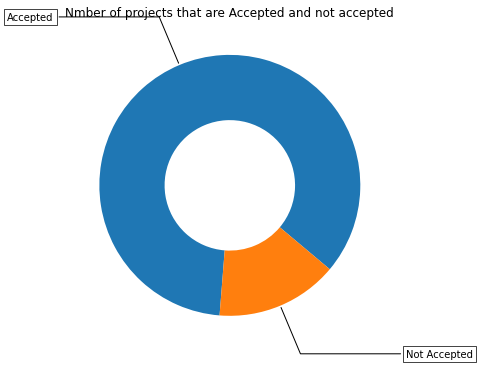

In [ ]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [ ]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='us-map-heat-map')

In [ ]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

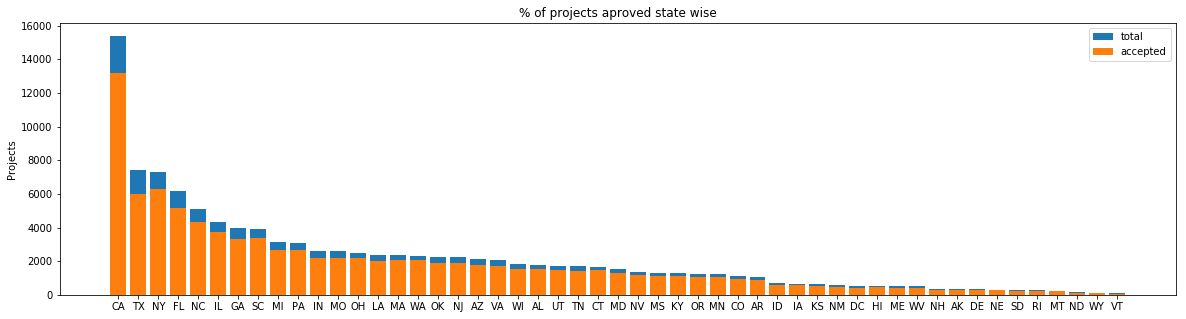

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [ ]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__Every state is having more than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

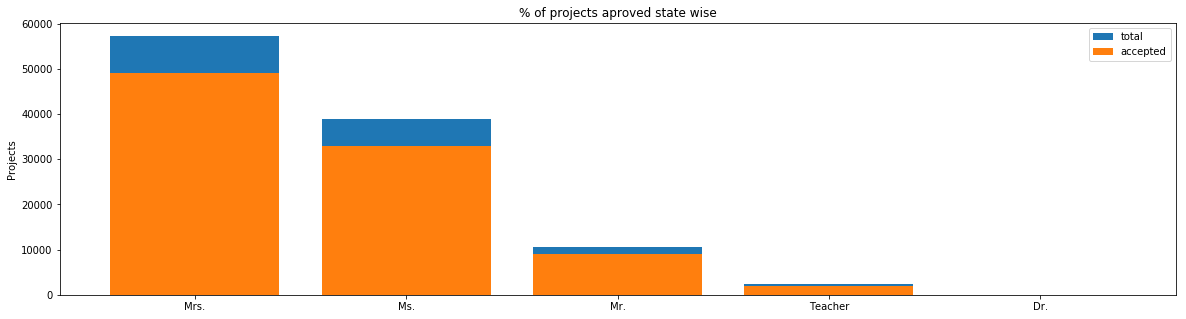

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [ ]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

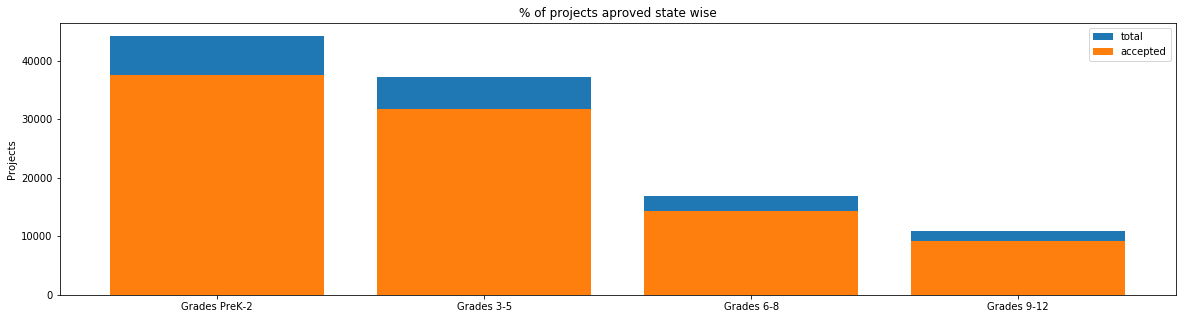

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [ ]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [ ]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [ ]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


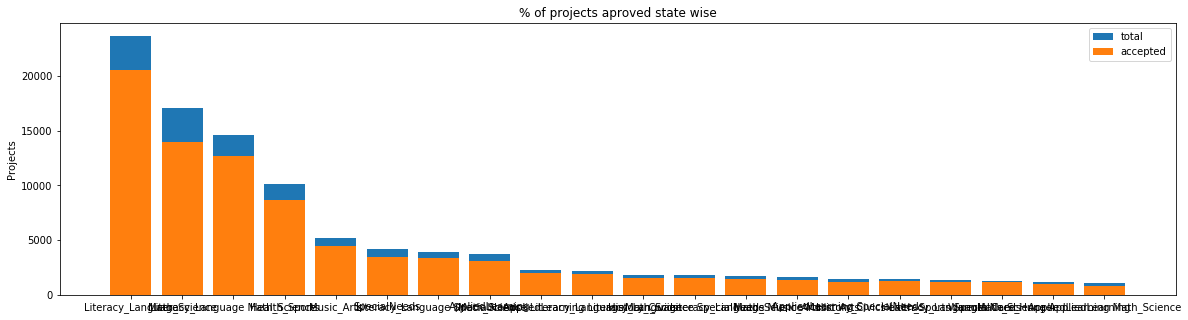

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [ ]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [ ]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

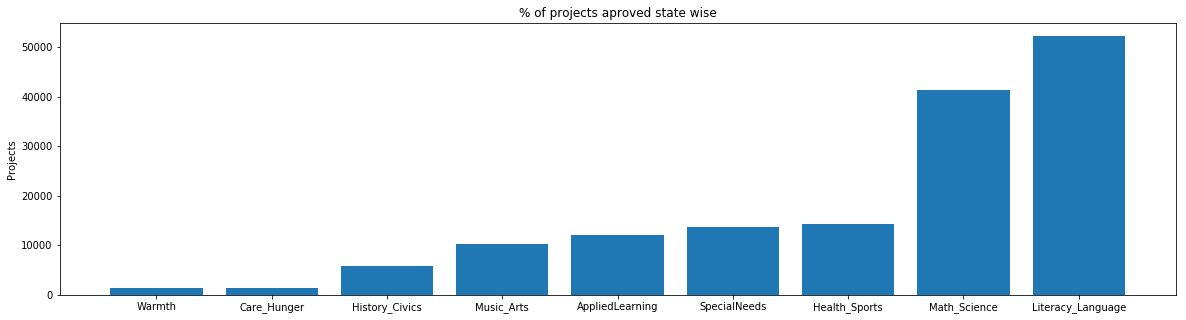

In [ ]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [ ]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [ ]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [ ]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


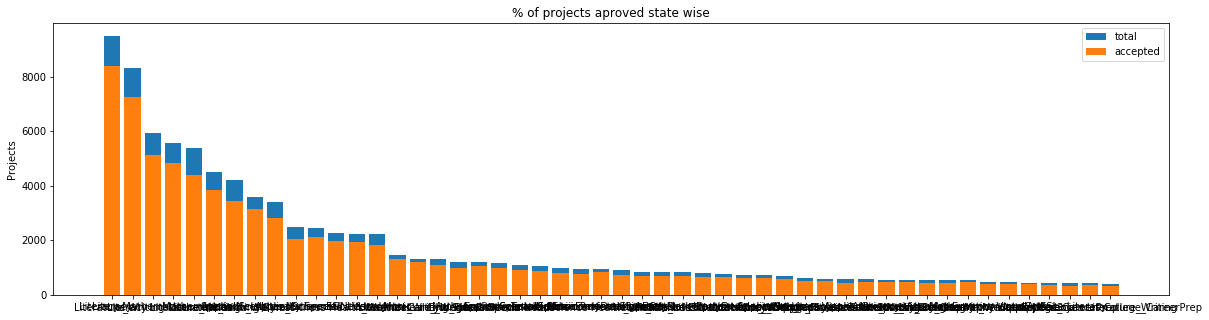

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [ ]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [ ]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

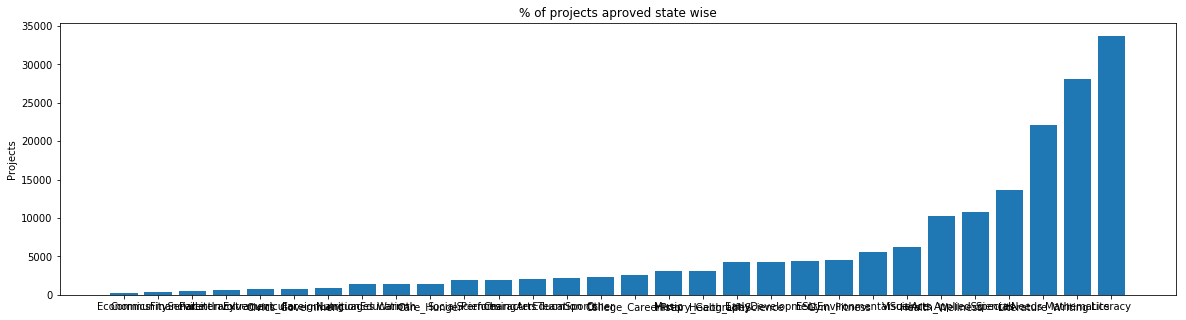

In [ ]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [ ]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

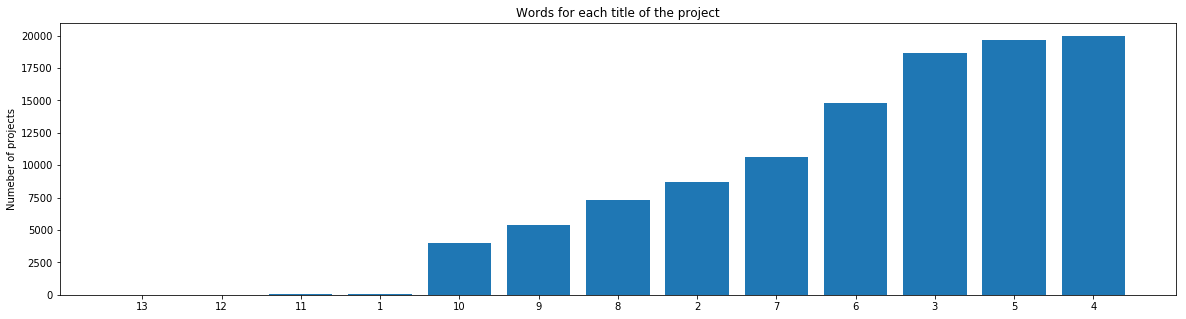

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [ ]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

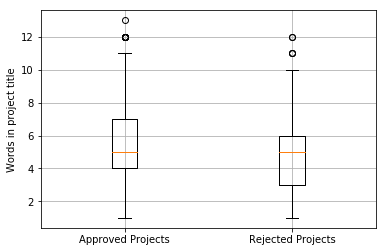

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

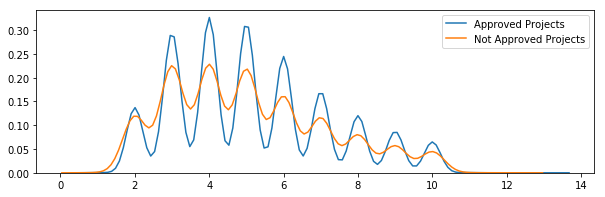

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

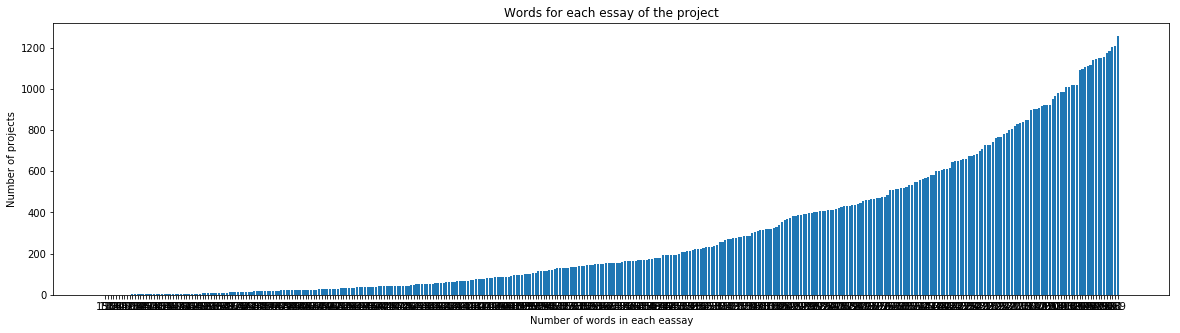

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

D:\installed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



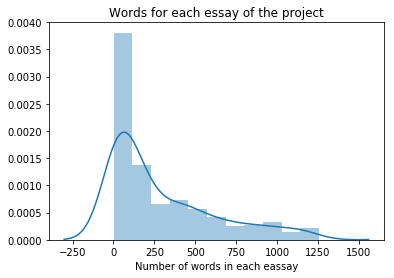

In [ ]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()


In [ ]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

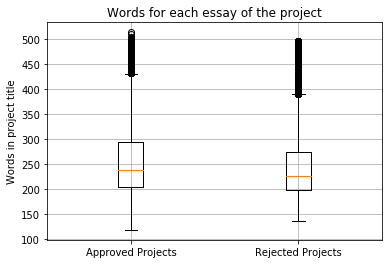

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

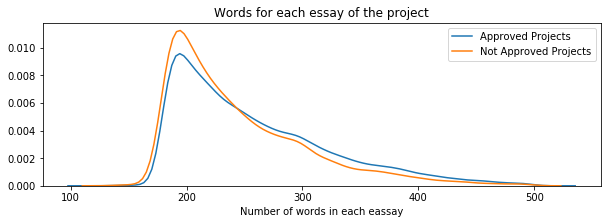

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project


In [ ]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [ ]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [ ]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [ ]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

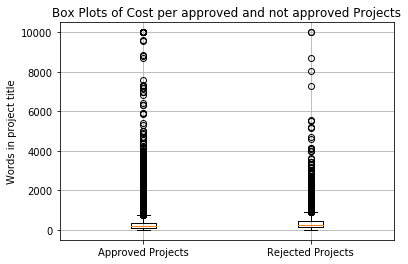

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

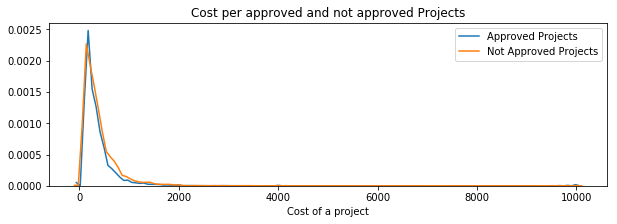

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [ ]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

###<font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font>

Please do this by yourself

observe the data analysis that was done in the above cells

In [ ]:
accepted_count = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
rejected_count = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

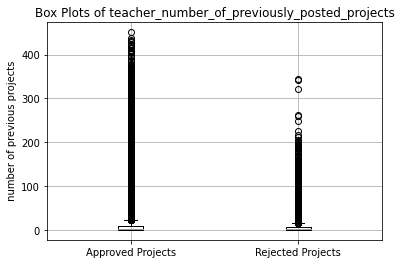

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([accepted_count, rejected_count])
plt.title('Box Plots of teacher_number_of_previously_posted_projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel(' number of previous projects')
plt.grid()
plt.show()

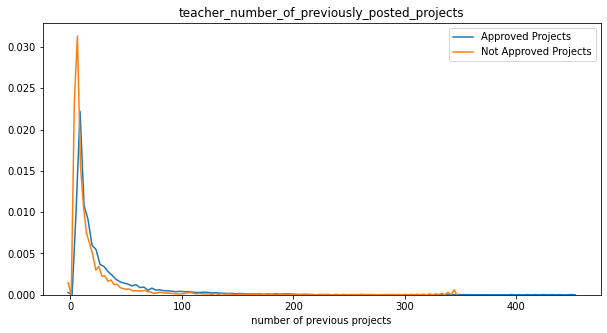

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(accepted_count, hist=False, label="Approved Projects")
sns.distplot(rejected_count, hist=False, label="Not Approved Projects")
plt.title('teacher_number_of_previously_posted_projects')
plt.xlabel(' number of previous projects ')
plt.legend()
plt.show()

In [ ]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(accepted_count,i), 3), np.round(np.percentile(rejected_count,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          3.0         

###<font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font>

Please do this by yourself

check the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project

if you feel like it will helpfull in the classification, please include in the further process or you can ignore it.

<h4> Making  new column summary_contain_num which has value 0 if there is no digit in project_resource_summary else it contains 1 i.e. there is some digit

In [ ]:
project_data['summary_contain_num'] = project_data.apply(lambda row: any(y.isdigit() for  y in row['project_resource_summary'].split()), axis = 1)

In [ ]:
project_data[project_data['summary_contain_num']== 1]['summary_contain_num'].apply('count')

11237

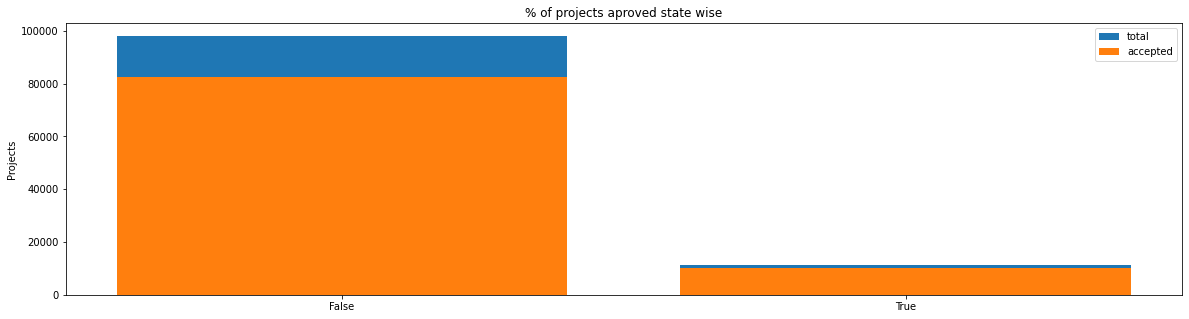

   summary_contain_num  project_is_approved  total       Avg
0                False                82562  98011  0.842375
1                 True                10144  11237  0.902732
   summary_contain_num  project_is_approved  total       Avg
0                False                82562  98011  0.842375
1                 True                10144  11237  0.902732


In [ ]:
univariate_barplots(project_data, 'summary_contain_num', 'project_is_approved' , top=False)

# 2. Preprocessing Categorical Features: project_grade_category

In [ ]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

In [ ]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

# 3. Preprocessing Categorical Features: project_subject_categories

In [ ]:
project_data['project_subject_categories'].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

>remove spaces, 'the' <br>
replace '&' with '\_', and ',' with '_'

In [ ]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
project_data['project_subject_categories'].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

# 4. Preprocessing Categorical Features: teacher_prefix

In [ ]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [ ]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


>numebr of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [ ]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [ ]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

>Remove '.' <br>
>convert all the chars to small

In [ ]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# 5. Preprocessing Categorical Features: project_subject_subcategories

In [ ]:
project_data['project_subject_subcategories'].value_counts()

Literacy                                    9486
Literacy, Mathematics                       8325
Literature & Writing, Mathematics           5923
Literacy, Literature & Writing              5571
Mathematics                                 5379
                                            ... 
Civics & Government, Parent Involvement        1
Community Service, Financial Literacy          1
Parent Involvement, Team Sports                1
Civics & Government, Nutrition Education       1
Economics, Other                               1
Name: project_subject_subcategories, Length: 401, dtype: int64

> same process we did in project_subject_categories

In [ ]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts()

literacy                                 9486
literacy_mathematics                     8325
literature_writing_mathematics           5923
literacy_literature_writing              5571
mathematics                              5379
                                         ... 
civics_government_nutritioneducation        1
gym_fitness_parentinvolvement               1
financialliteracy_performingarts            1
college_careerprep_warmth_care_hunger       1
economics_music                             1
Name: project_subject_subcategories, Length: 401, dtype: int64

# 6. Preprocessing Categorical Features: school_state

In [ ]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

>convert all of them into small letters

In [ ]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

# 7. Preprocessing Categorical Features: project_title

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [ ]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [ ]:
# Combining all the above Statements

def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [ ]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:02<00:00, 42193.61it/s]


In [ ]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


In [ ]:
project_data['project_title'] = preprocessed_titles

# 8. Preprocessing Categorical Features: essay

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [ ]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [ ]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 109248/109248 [00:58<00:00, 1878.86it/s]


In [ ]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

In [ ]:
project_data['essay'] = preprocessed_essays

# 8. Preprocessing Numerical Values: price

In [ ]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [ ]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [ ]:
project_data['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [ ]:
project_data['std_price'].head()

0   -0.390533
1    0.002396
2    0.595191
3   -0.177469
4   -0.626236
Name: std_price, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [ ]:
project_data['nrm_price'].head()

0    0.015397
1    0.029839
2    0.051628
3    0.023228
4    0.006733
Name: nrm_price, dtype: float64

In [ ]:
from colab import 

# Assignment : 14

<pre>
1. Download the preprocessed DonorsChoose data from here <a href='https://drive.google.com/file/d/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO/view?usp=sharing'>Dataset</a>
2. Split the data into train, cv, and test
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric. you need to print the AUC value for each epoch. Note: you should NOT use the tf.metric.auc
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. You should Save the best model weights.
8. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
9. Use Categorical Cross Entropy as Loss to minimize.
10. try to get AUC more than 0.8 for atleast one model
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import random 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from nltk.stem.porter import PorterStemmer

from bs4 import BeautifulSoup


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from sklearn.metrics import roc_curve,accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

tf.compat.v1.disable_eager_execution()

In [ ]:
def concat(list):
    from tqdm.notebook import tqdm
    op= ' '
    print("making a Bag of words")
    for ele in tqdm(list):
        op = op + ' '+ str(ele)
    return op.split(' ')

In [ ]:
def fit(lst,top_word=0):
  from tqdm.notebook import tqdm
  import itertools
  corpus=[]
  dic={}
  corpus=concat(lst)
  print('generating word frequency dictionry')
  
  for p in tqdm(corpus):
    freq=0
    if p in dic.keys():
      pass
    else:
      freq=(corpus.count(p))
      dic[p]=freq
  sort_orders = dict(sorted(dic.items(), key=lambda x: x[1], reverse=True))
  print('dictionary sorted')

  if top_word :
      
    sort_orders = dict(itertools.islice(sort_orders.items(), top_word))
    print('top {} words extracted'.format(top_word))

  arr = list(sort_orders.keys())
  print('returnig dataframe')
  return np.array(arr)

In [ ]:
def transform(lst,fit):
  doc=[]
  from tqdm.notebook import tqdm
  fit=fit.tolist()
  print('generating document list containing sentance list in vetor form')
  for sent in tqdm(lst):
    sent_vect=[]
    for word in sent.split(' '):
      try:
            idx = fit.index(str(word))+2
      except:
            idx = 1
      sent_vect.append(idx)
    doc.append(sent_vect)
  return doc

#### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

In [ ]:
data = pd.read_csv('preprocessed_data.csv')

In [ ]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [ ]:
y = data['project_is_approved'].values

In [ ]:
data.drop(['project_is_approved'], axis=1, inplace=True)

In [ ]:
data['remaining_input'] = data['teacher_number_of_previously_posted_projects'] + data['price']

In [ ]:
data.replace(to_replace=np.NaN, value= str('nan'),inplace=True)

In [ ]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'remaining_input'],
      dtype='object')

In [ ]:
col = ['teacher_prefix', 'school_state', 'project_grade_category',
       'clean_categories', 'clean_subcategories','essay',
       'remaining_input']
data = data[col]

In [ ]:
data.columns

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'clean_categories', 'clean_subcategories', 'essay', 'remaining_input'],
      dtype='object')

In [ ]:
data.head()

,teacher_prefix,school_state,project_grade_category,clean_categories,clean_subcategories,essay,remaining_input
0,mrs,ca,grades_prek_2,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,778.05
1,ms,ut,grades_3_5,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,217.03
2,mrs,ca,grades_prek_2,literacy_language,literacy,having class 24 students comes diverse learner...,339.00
3,mrs,ga,grades_prek_2,appliedlearning,earlydevelopment,i recently read article giving students choice...,483.04
4,mrs,wa,grades_3_5,literacy_language,literacy,my students crave challenge eat obstacles brea...,19.74


####Encoding categorial features

In [ ]:
vocab_dict={}

In [ ]:
print(data['teacher_prefix'].describe())
vocab_dict['teacher_prefix'] = data['teacher_prefix'].describe()['unique']
data['teacher_prefix'] = transform(data['teacher_prefix'].values, fit(data['teacher_prefix'].values))

count     109248
unique         5
top          mrs
freq       57272
Name: teacher_prefix, dtype: object
making a Bag of words



generating word frequency dictionry



dictionary sorted
returnig dataframe
generating document list containing sentance list in vetor form


In [ ]:
print(data['school_state'].describe())
vocab_dict['school_state'] = data['school_state'].describe()['unique']
data['school_state'] = transform(data['school_state'].values, fit(data['school_state'].values))

count     109248
unique        51
top           ca
freq       15388
Name: school_state, dtype: object
making a Bag of words



generating word frequency dictionry



dictionary sorted
returnig dataframe
generating document list containing sentance list in vetor form


In [ ]:
print(data['project_grade_category'].describe())
vocab_dict['project_grade_category'] = data['project_grade_category'].describe()['unique']
data['project_grade_category'] = transform(data['project_grade_category'].values, fit(data['project_grade_category'].values))

count            109248
unique                4
top       grades_prek_2
freq              44225
Name: project_grade_category, dtype: object
making a Bag of words



generating word frequency dictionry



dictionary sorted
returnig dataframe
generating document list containing sentance list in vetor form


In [ ]:
print(data['clean_categories'].describe())
vocab_dict['clean_categories'] = data['clean_categories'].describe()['unique']
data['clean_categories'] = transform(data['clean_categories'].values, fit(data['clean_categories'].values))

count                109248
unique                   51
top       literacy_language
freq                  23655
Name: clean_categories, dtype: object
making a Bag of words



generating word frequency dictionry



dictionary sorted
returnig dataframe
generating document list containing sentance list in vetor form


In [ ]:
print(data['clean_subcategories'].describe())
vocab_dict['clean_subcategories'] = data['clean_subcategories'].describe()['unique']
data['clean_subcategories'] = transform(data['clean_subcategories'].values, fit(data['clean_subcategories'].values))

count       109248
unique         401
top       literacy
freq          9486
Name: clean_subcategories, dtype: object
making a Bag of words



generating word frequency dictionry



dictionary sorted
returnig dataframe
generating document list containing sentance list in vetor form


In [ ]:
data.head()

,teacher_prefix,school_state,project_grade_category,clean_categories,clean_subcategories,essay,remaining_input
0,[2],[2],[2],[3],"[6, 13]",i fortunate enough use fairy tale stem kits cl...,778.05
1,[3],[24],[3],[5],[5],imagine 8 9 years old you third grade classroo...,217.03
2,[2],[2],[2],[2],[2],having class 24 students comes diverse learner...,339.00
3,[2],[8],[2],[6],[12],i recently read article giving students choice...,483.04
4,[2],[17],[3],[2],[2],my students crave challenge eat obstacles brea...,19.74


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y ,test_size=0.3,random_state=0, stratify = y)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(76473, 2)

####Encoding the Essay Texts

In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


t = Tokenizer()
t.fit_on_texts(X_train['essay'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
X_train_essay = t.texts_to_sequences(X_train['essay'])
X_test_essay = t.texts_to_sequences(X_test['essay'])

print(X_train_essay)



# pad documents to a max length of 4 words
max_length = 500
X_tr_essay = pad_sequences(X_train_essay, maxlen=max_length, padding='post')
X_ts_essay = pad_sequences(X_test_essay, maxlen=max_length, padding='post')

print(X_tr_essay)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[   4    1   22 ...    0    0    0]
 [   4    1 1071 ...    0    0    0]
 [ 169  677  852 ...    0    0    0]
 ...
 [   2  325    1 ...    0    0    0]
 [  14   64  149 ...    0    0    0]
 [  14   82    3 ...    0    0    0]]


In [ ]:
# load the whole embedding into memory

embeddings_index = dict()
fr = open('glove_vectors','rb')
f = pickle.load(fr)
# for line in f:
# 	values = line.split()
# 	word = values[0]
# 	coefs = np.asarray(values[1:], dtype='float32')
# 	embeddings_index[word] = coefs
# print('Loaded %s word vectors.' % len(embeddings_index))




# # create a weight matrix for words in training docs
# embedding_matrix = np.zeros((vocab_size, 300))
# for word, i in t.word_index.items():
# 	embedding_vector = embeddings_index.get(word)
# 	if embedding_vector is not None:
# 		embedding_matrix[i] = embedding_vector


def embedding_mat(word_index,embedding_dim = 300):
	embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
	for word, i in word_index.items():
			embedding_vector =  f.get(word)
			if embedding_vector is not None:
					embedding_matrix[i] = embedding_vector
	return embedding_matrix

embedding_matrix = embedding_mat(t.word_index)	

In [ ]:
#https://stackoverflow.com/questions/50339065/how-to-get-maximum-length-of-each-column-in-the-data-frame-using-pandas-python

len_dict = dict( 
    [
        (v, X_train[v].apply(lambda r: len(str(r)) if r!=None else 0).max()) 
            for v in X_train.columns.values 
    ])

In [ ]:
len_dict

{'clean_categories': 10,
 'clean_subcategories': 12,
 'essay': 2657,
 'project_grade_category': 3,
 'remaining_input': 18,
 'school_state': 4,
 'teacher_prefix': 3}

In [ ]:
vocab_dict

{'clean_categories': 51,
 'clean_subcategories': 401,
 'project_grade_category': 4,
 'school_state': 51,
 'teacher_prefix': 5}

####Padding 

In [ ]:
max_review_length = 3

X_tr_teacher_prefix = pad_sequences(X_train['teacher_prefix'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_ts_teacher_prefix = pad_sequences(X_test['teacher_prefix'], maxlen=max_review_length)


In [ ]:
# max_review_length = len_dict['school_state']

X_tr_school_state = pad_sequences(X_train['school_state'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_ts_school_state = pad_sequences(X_test['school_state'], maxlen=max_review_length)


In [ ]:
# max_review_length = len_dict['clean_categories']

X_tr_clean_categories = pad_sequences(X_train['clean_categories'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_ts_clean_categories = pad_sequences(X_test['clean_categories'], maxlen=max_review_length)


In [ ]:
# max_review_length = len_dict['clean_subcategories']

X_tr_clean_subcategories = pad_sequences(X_train['clean_subcategories'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_ts_clean_subcategories = pad_sequences(X_test['clean_subcategories'], maxlen=max_review_length)


In [ ]:
# max_review_length = len_dict['project_grade_category']

X_tr_project_grade_category = pad_sequences(X_train['project_grade_category'], maxlen=max_review_length)  #padding zeros at the begining of each review to make max len as 200
X_ts_project_grade_category = pad_sequences(X_test['project_grade_category'], maxlen=max_review_length)


In [ ]:
tr=[X_tr_essay,X_tr_teacher_prefix,X_tr_school_state,X_tr_clean_categories,X_tr_clean_subcategories,X_tr_project_grade_category,X_train['remaining_input']]

ts=[X_ts_essay,X_ts_teacher_prefix,X_ts_school_state,X_ts_clean_categories,X_ts_clean_subcategories,X_ts_project_grade_category,X_test['remaining_input']]

####Model defining

In [ ]:
#AUC score
def auc( y_true, y_pred ) :
        return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)



def step_decay(epoch):
    import math
    initial_lrate = 0.0001
    drop = 1e-6
    epochs_drop = 1
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [ ]:
# !git clone https://github.com/bckenstler/CLR

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense,SpatialDropout1D,LSTM,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,BatchNormalization,concatenate
from tensorflow.keras.regularizers import L1,L2
from tensorflow.keras.models import load_model
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from CLR import clr_callback
tf.compat.v1.disable_eager_execution()

In [ ]:
len_dict

{'clean_categories': 10,
 'clean_subcategories': 12,
 'essay': 2657,
 'project_grade_category': 3,
 'remaining_input': 18,
 'school_state': 4,
 'teacher_prefix': 3}

In [ ]:
vocab_dict

{'clean_categories': 51,
 'clean_subcategories': 401,
 'project_grade_category': 4,
 'school_state': 51,
 'teacher_prefix': 5}

In [ ]:
tf.keras.backend.clear_session()


#input 1
input1 = Input(shape=(500,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = Dropout(0.3)(x1)
x1 = BatchNormalization()(x1)
x1 = LSTM(128,return_sequences=True,)(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
# x1 = LSTM(128,return_sequences=True,recurrent_activation="sigmoid")(x1)
# x1 = Dropout(0.7)(x1)


x1 = Flatten()(x1)

#input 2
input2 = Input(shape=(max_review_length,))
x2 = Embedding(input_dim= vocab_dict['teacher_prefix']+2,output_dim= 2)(input2)
x2 = Flatten()(x2)

#input 3
input3 = Input(shape=(max_review_length,))
x3 = Embedding(input_dim= vocab_dict['school_state']+2,output_dim= 2)(input3)
x3 = Flatten()(x3)

#input 4
input4 = Input(shape=(max_review_length,))
x4 = Embedding(input_dim=vocab_dict['clean_categories']+2,output_dim= 2)(input4)
x4 = Flatten()(x4)

#input 5
input5 = Input(shape=(max_review_length,))
x5 = Embedding(input_dim= vocab_dict['clean_subcategories']+2,output_dim= 10)(input5)
x5 = Flatten()(x5)

#input 6
input6 = Input(shape=(max_review_length,))
x6 = Embedding(input_dim= vocab_dict['project_grade_category']+2,output_dim= 2)(input6)
x6 = Flatten()(x6)

#input 7
input7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L1(0.01))(input7)

#merging all the inputs 
Concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(64,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(Concat)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.1)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 300)     14799000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 500, 32)      42624       embedding[0][0]                  
__________________________________________________________________________________________________
dropout (Dropout)               (None, 500, 32)      0           lstm[0][0]                       
_______________________________________________________________________________________

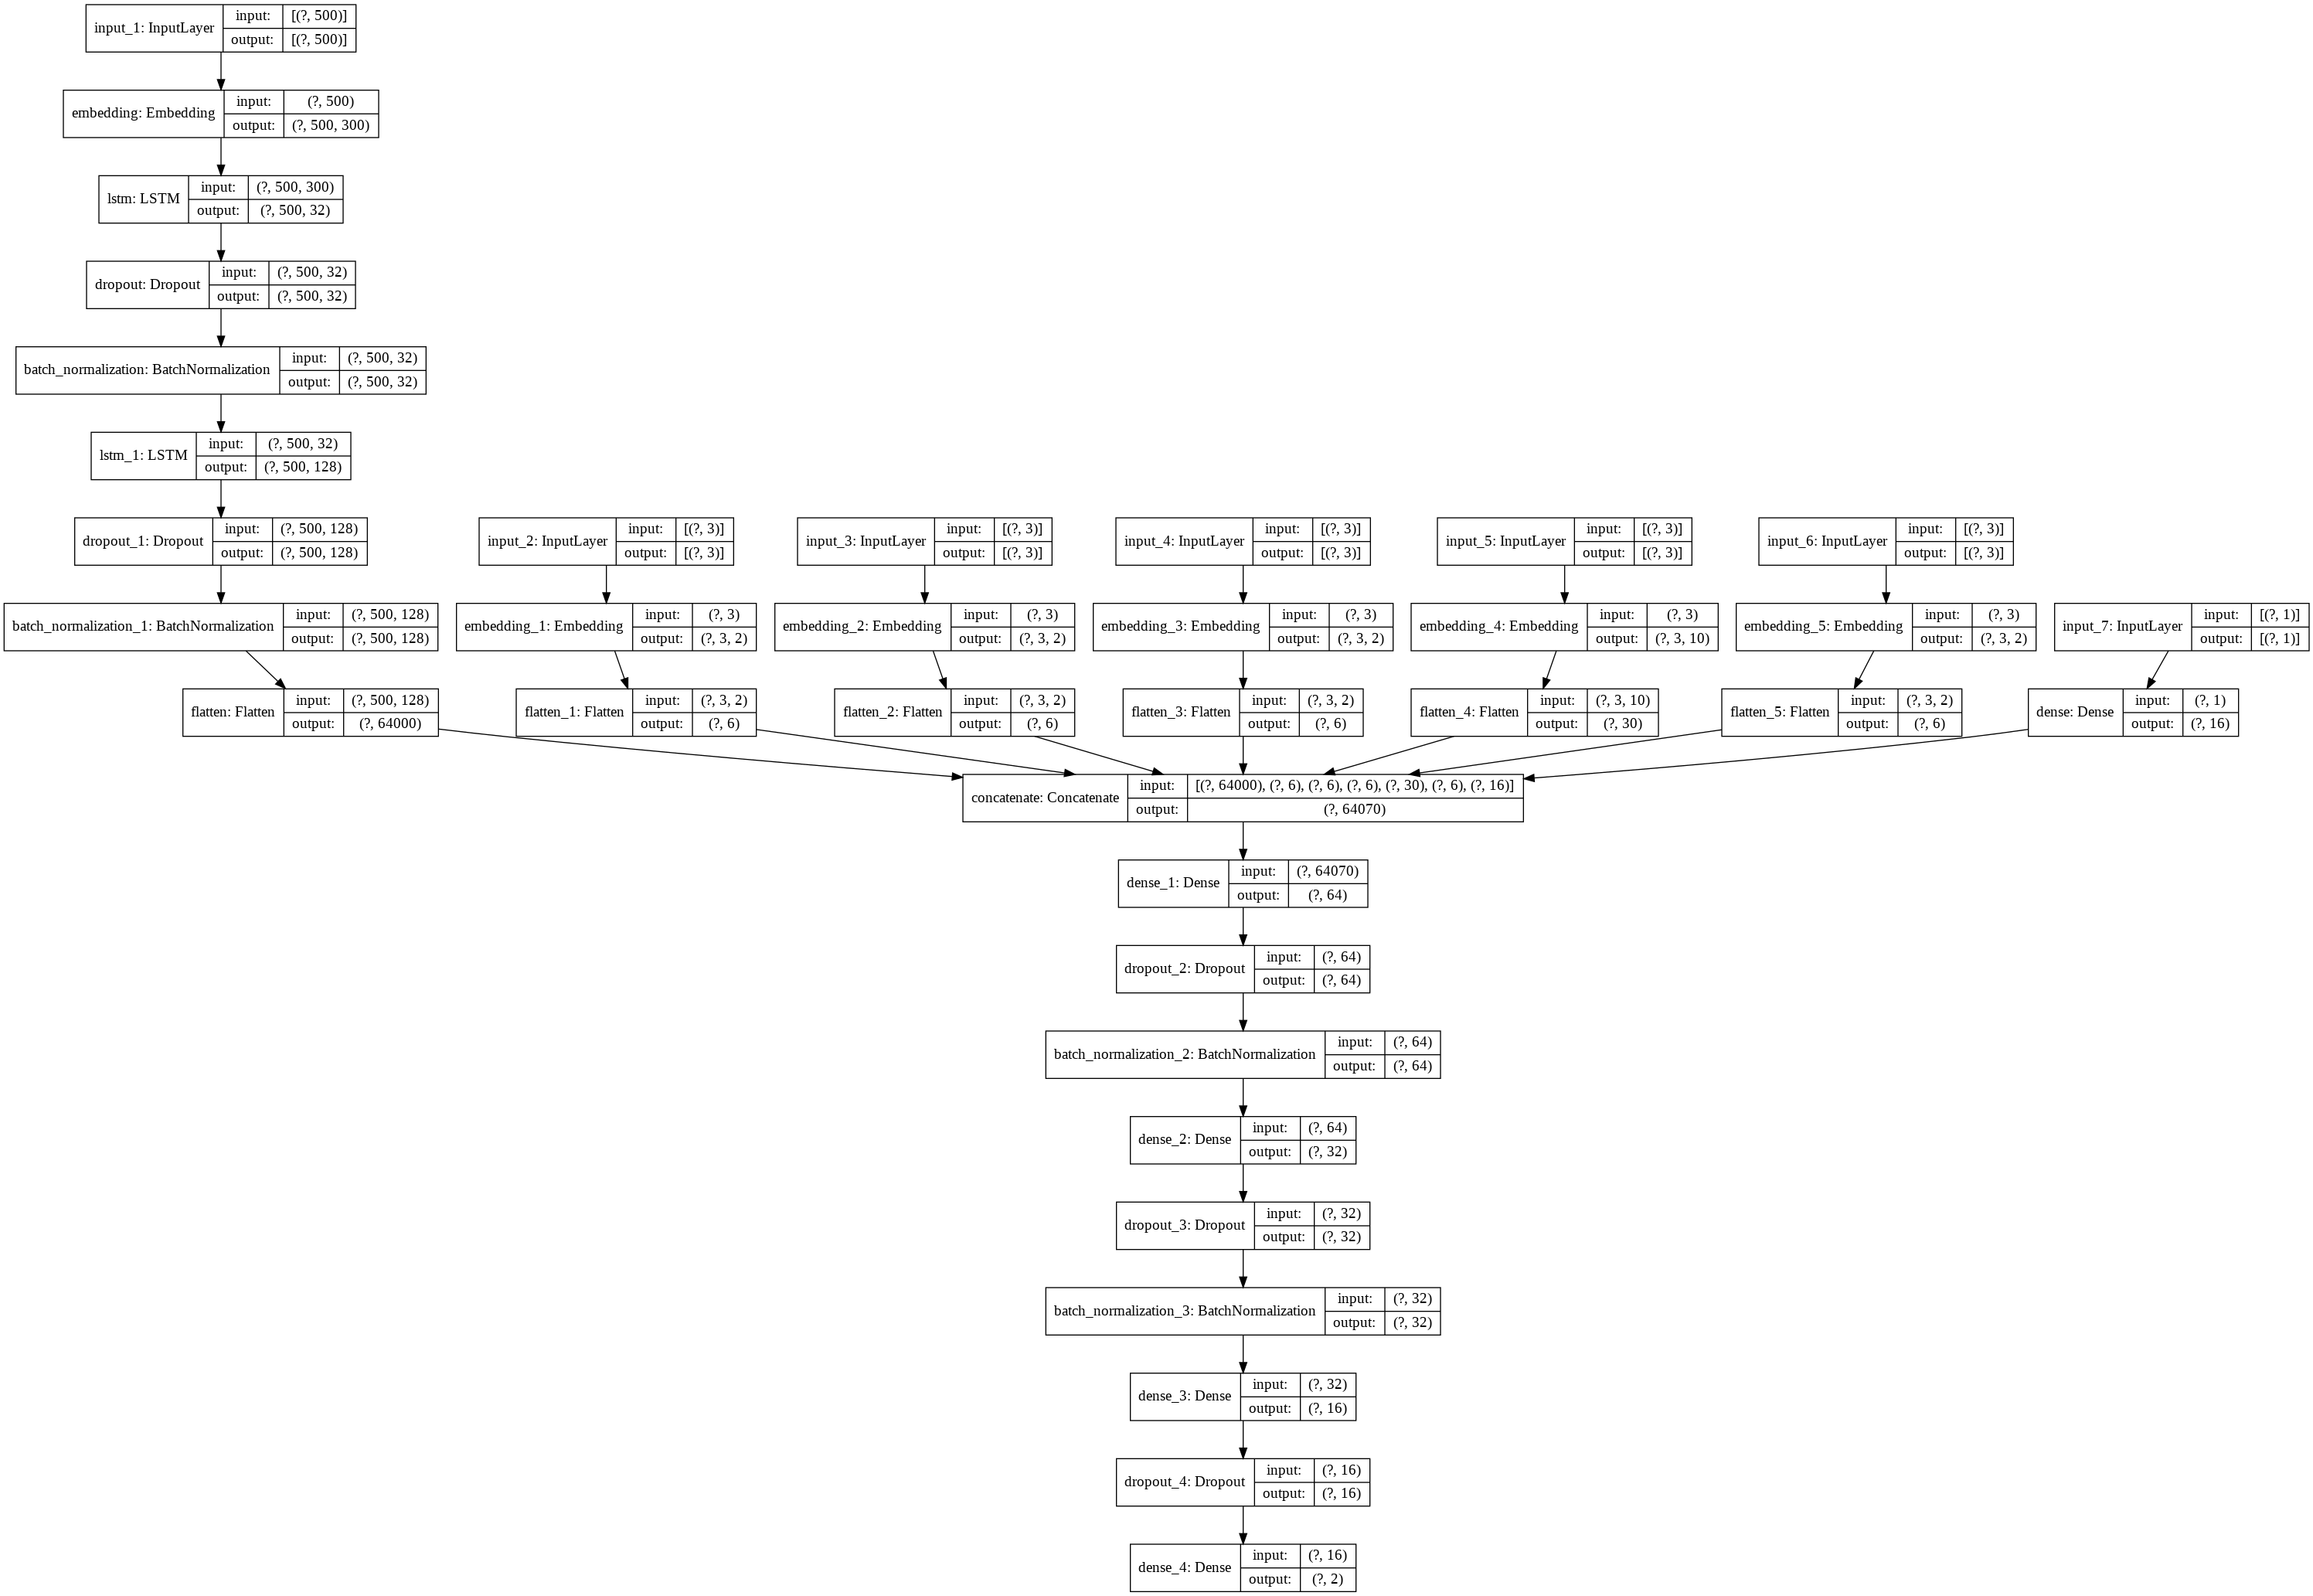

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
filepath="bestgpu.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
earlystopping = EarlyStopping(monitor='val_auc',min_delta=0.0001, patience=10, verbose=1)
tensorboard = TensorBoard(log_dir='fit/{}'.format(time()))
lr = LearningRateScheduler(step_decay)
clr_triangular = CyclicLR(mode='triangular')

callbacks_list = [checkpoint,lr,earlystopping,tensorboard,clr_triangular]

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay = 1e-4),metrics=[auc])


history = model.fit(tr, y_train, validation_split = 0.3, epochs=50, verbose=1, batch_size=512, callbacks = callbacks_list)

Train on 53531 samples, validate on 22942 samples
Epoch 1/50
53531/53531 [==============================] - ETA: 0s - loss: 0.7325 - auc: 0.5414
Epoch 00001: val_auc improved from -inf to 0.55632, saving model to bestgpu.hdf5
53531/53531 [==============================] - 165s 3ms/sample - loss: 0.7325 - auc: 0.5414 - val_loss: 0.7282 - val_auc: 0.5563
Epoch 2/50
53531/53531 [==============================] - ETA: 0s - loss: 0.6417 - auc: 0.6047
Epoch 00002: val_auc improved from 0.55632 to 0.68314, saving model to bestgpu.hdf5
53531/53531 [==============================] - 162s 3ms/sample - loss: 0.6417 - auc: 0.6047 - val_loss: 0.6082 - val_auc: 0.6831
Epoch 3/50
53531/53531 [==============================] - ETA: 0s - loss: 0.5972 - auc: 0.6739
Epoch 00003: val_auc improved from 0.68314 to 0.71618, saving model to bestgpu.hdf5
53531/53531 [==============================] - 160s 3ms/sample - loss: 0.5972 - auc: 0.6739 - val_loss: 0.5782 - val_auc: 0.7162
Epoch 4/50
53531/53531 [=====

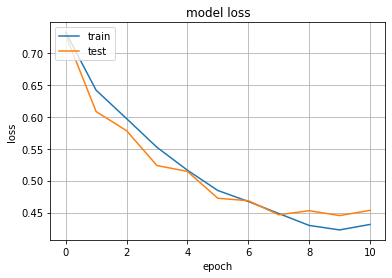

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
tf.keras.backend.clear_session()


#input 1
input1 = Input(shape=(500,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = Dropout(0.3)(x1)
x1 = BatchNormalization()(x1)
x1 = LSTM(128,return_sequences=True,)(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
# x1 = LSTM(128,return_sequences=True,recurrent_activation="sigmoid")(x1)
# x1 = Dropout(0.7)(x1)


x1 = Flatten()(x1)

#input 2
input2 = Input(shape=(max_review_length,))
x2 = Embedding(input_dim= vocab_dict['teacher_prefix']+2,output_dim= 2)(input2)
x2 = Flatten()(x2)

#input 3
input3 = Input(shape=(max_review_length,))
x3 = Embedding(input_dim= vocab_dict['school_state']+2,output_dim= 2)(input3)
x3 = Flatten()(x3)

#input 4
input4 = Input(shape=(max_review_length,))
x4 = Embedding(input_dim=vocab_dict['clean_categories']+2,output_dim= 2)(input4)
x4 = Flatten()(x4)

#input 5
input5 = Input(shape=(max_review_length,))
x5 = Embedding(input_dim= vocab_dict['clean_subcategories']+2,output_dim= 10)(input5)
x5 = Flatten()(x5)

#input 6
input6 = Input(shape=(max_review_length,))
x6 = Embedding(input_dim= vocab_dict['project_grade_category']+2,output_dim= 2)(input6)
x6 = Flatten()(x6)

#input 7
input7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L1(0.01))(input7)

#merging all the inputs 
Concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(64,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(Concat)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.1)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)
model.load_weights('bestgpu.hdf5')

#### Train AUC

In [ ]:
roc_auc_score(y_train,model.predict(tr))

0.7850252836667377

#### Test AUC

In [ ]:
roc_auc_score(y_test,model.predict(ts))

0.760770265186021

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data feature 'essay' <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
tf_vec.fit(X_train['essay'])
idf = tf_vec.idf_

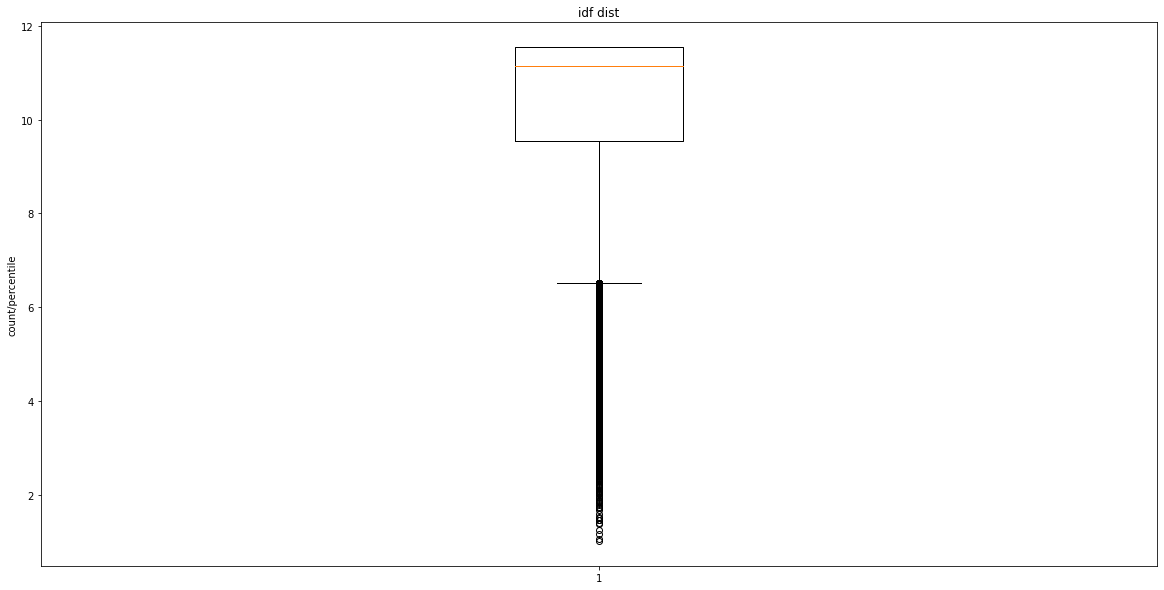

In [ ]:
plt.figure(figsize=(20,10))
plt.boxplot(idf)
plt.title('idf dist')
plt.ylabel('count/percentile')
plt.show()

In [ ]:
for i in range(0,101,2):
  print(f' {i}th percentile value percentile {np.percentile(idf,[i])}')

 0th percentile value percentile [1.00800855]
 2th percentile value percentile [4.93930297]
 4th percentile value percentile [5.85111534]
 6th percentile value percentile [6.56453348]
 8th percentile value percentile [7.08565079]
 10th percentile value percentile [7.51731827]
 12th percentile value percentile [7.86267946]
 14th percentile value percentile [8.16716865]
 16th percentile value percentile [8.46051646]
 18th percentile value percentile [8.74819853]
 20th percentile value percentile [8.98660955]
 22th percentile value percentile [9.20018366]
 24th percentile value percentile [9.41149275]
 26th percentile value percentile [9.60564876]
 28th percentile value percentile [9.75979944]
 30th percentile value percentile [9.942121]
 32th percentile value percentile [10.04748152]
 34th percentile value percentile [10.16526455]
 36th percentile value percentile [10.29879594]
 38th percentile value percentile [10.45294662]
 40th percentile value percentile [10.63526818]
 42th percentil

In [ ]:
for i in range(0,101,25):
  print(f' {i}th percentile value percentile {np.percentile(idf,[i])}')

 0th percentile value percentile [1.00800855]
 25th percentile value percentile [9.53665589]
 50th percentile value percentile [11.1460938]
 75th percentile value percentile [11.55155891]
 100th percentile value percentile [11.55155891]


In [ ]:
rm_feat = []
a=np.percentile(idf,1)
b=np.percentile(idf,75)
for x,y in zip(tf_vec.get_feature_names(),idf):
    
    if y < a or y > b:
        rm_feat.append(x)

In [ ]:
from tqdm.notebook import tqdm
def trim_text(essay_text,feat_name):

  preprocessed_text = []
  for sent in tqdm(essay_text):
    words = sent.split()
    final_sent = ''
    for word in words:
      if word in feat_name:
        pass
      else:
       
        final_sent += ' ' + word
        
    preprocessed_text.append(final_sent)

  return preprocessed_text

In [ ]:
%%time
i=254
z=trim_text([X_train['essay'][i]],rm_feat)


CPU times: user 33.9 ms, sys: 1.92 ms, total: 35.8 ms
Wall time: 38 ms


In [ ]:
print([X_train['essay'][i]])
print(z)

['every year first day school students always ask exact question will dissecting frogs it always number one experience incredibly eager project give opportunity my students 7th graders excited hands opportunities science curious world around think gross things awesome they lots questions incredible imaginations they talkative like move around learn best get things since start school itching get hands frog specimens i not sure desire stems whether memory parent sibling scene movie dissecting frog top middle school bucket list our school not many resources as neighborhood school struggle get bare minimum providing funds dissection unfortunately not within school means my students wrapping learning human body systems primarily digestive circulatory respiratory musculoskeletal systems the frog dissection enable hands experience systems students working teams dissect frog identify structures studied review functions compare contrast structures found human body in addition seeing firsthand s

In [ ]:
X_train_idf_essay = trim_text(X_train['essay'],rm_feat)

In [ ]:
X_test_idf_essay = trim_text(X_test['essay'],rm_feat)

In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

t = Tokenizer()
t.fit_on_texts(X_train_idf_essay)
vocab_size = len(t.word_index) + 1
# integer encode the documents
X_train_essay = t.texts_to_sequences(X_train_idf_essay)
X_test_essay = t.texts_to_sequences(X_test_idf_essay)



# pad documents to a max length of 4 words
max_length = 300
X_tr_essay = pad_sequences(X_train_essay, maxlen=max_length, padding='post')
X_ts_essay = pad_sequences(X_test_essay, maxlen=max_length, padding='post')

In [ ]:
# load the whole embedding into memory

embeddings_index = dict()
fr = open('glove_vectors','rb')
f = pickle.load(fr)

def embedding_mat(word_index,embedding_dim = 300):
	embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
	for word, i in word_index.items():
			embedding_vector =f.get(word)
			if embedding_vector is not None:
					embedding_matrix[i] = embedding_vector
	return embedding_matrix

embedding_matrix = embedding_mat(t.word_index)	

In [ ]:
tr=[X_tr_essay,X_tr_teacher_prefix,X_tr_school_state,X_tr_clean_categories,X_tr_clean_subcategories,X_tr_project_grade_category,X_train['remaining_input']]

ts=[X_ts_essay,X_ts_teacher_prefix,X_ts_school_state,X_ts_clean_categories,X_ts_clean_subcategories,X_ts_project_grade_category,X_test['remaining_input']]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense,SpatialDropout1D,LSTM,Flatten,Conv1D,GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,BatchNormalization,concatenate
from tensorflow.keras.regularizers import L1,L2
from tensorflow.keras.models import load_model
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from CLR.clr_callback import *
tf.compat.v1.disable_eager_execution()

In [ ]:
print(vocab_size)

48837


In [ ]:
tf.keras.backend.clear_session()


#input 1
input1 = Input(shape=(300,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = Dropout(0.3)(x1)
x1 = BatchNormalization()(x1)
x1 = LSTM(128,return_sequences=True,)(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
# x1 = LSTM(128,return_sequences=True,recurrent_activation="sigmoid")(x1)
# x1 = Dropout(0.7)(x1)


x1 = Flatten()(x1)

#input 2
input2 = Input(shape=(max_review_length,))
x2 = Embedding(input_dim= vocab_dict['teacher_prefix']+2,output_dim= 2)(input2)
x2 = Flatten()(x2)

#input 3
input3 = Input(shape=(max_review_length,))
x3 = Embedding(input_dim= vocab_dict['school_state']+2,output_dim= 2)(input3)
x3 = Flatten()(x3)

#input 4
input4 = Input(shape=(max_review_length,))
x4 = Embedding(input_dim=vocab_dict['clean_categories']+2,output_dim= 2)(input4)
x4 = Flatten()(x4)

#input 5
input5 = Input(shape=(max_review_length,))
x5 = Embedding(input_dim= vocab_dict['clean_subcategories']+2,output_dim= 10)(input5)
x5 = Flatten()(x5)

#input 6
input6 = Input(shape=(max_review_length,))
x6 = Embedding(input_dim= vocab_dict['project_grade_category']+2,output_dim= 2)(input6)
x6 = Flatten()(x6)

#input 7
input7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L1(0.01))(input7)

#merging all the inputs 
Concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(64,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(Concat)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.1)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)

print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     14651100    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 300, 32)      42624       embedding[0][0]                  
__________________________________________________________________________________________________
dropout (Dropout)               (None, 300, 32)      0           lstm[0][0]                       
_______________________________________________________________________________________

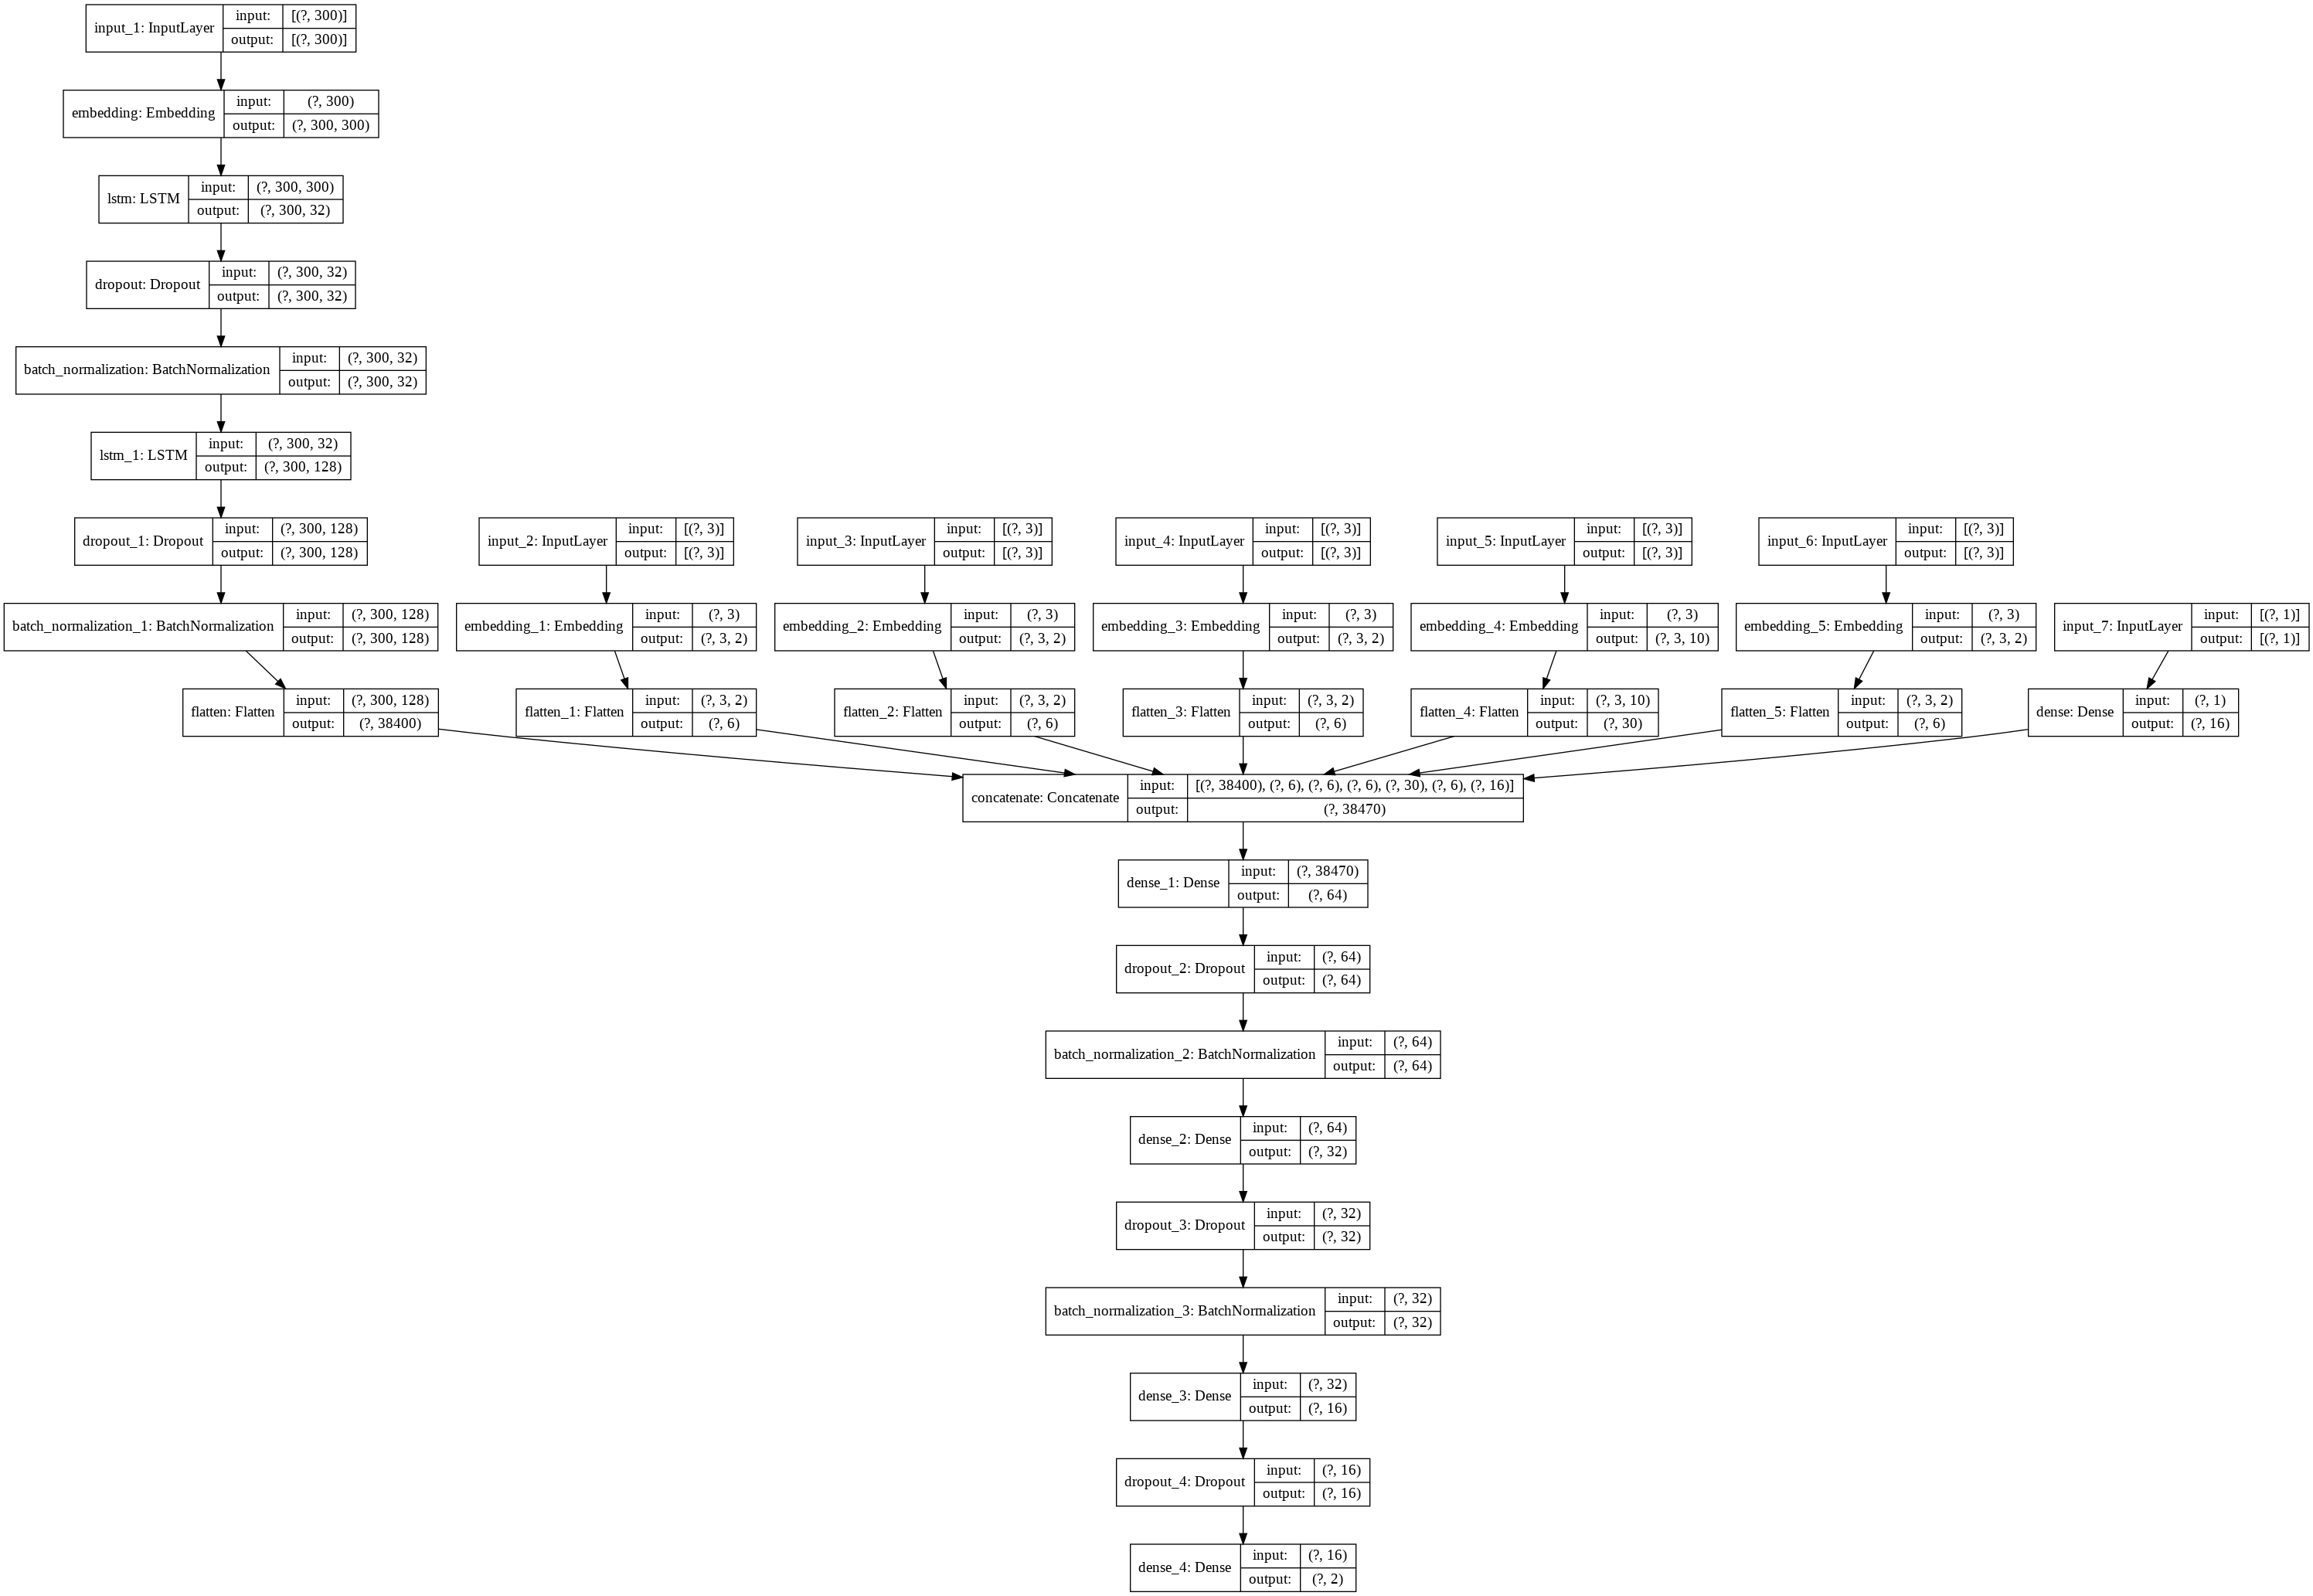

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
filepath="model2_1.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
earlystopping = EarlyStopping(monitor='val_auc',min_delta=0.00001, patience=10, verbose=1)
lr = LearningRateScheduler(step_decay)
clr_triangular = CyclicLR(mode='triangular')

callbacks_list = [checkpoint,lr,earlystopping,clr_triangular]

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay = 1e-4),metrics=[auc])


history = model.fit(tr, y_train, validation_split = 0.3, epochs=30, verbose=1, batch_size=512, callbacks = callbacks_list)

Train on 53531 samples, validate on 22942 samples
Epoch 1/30
53531/53531 [==============================] - ETA: 0s - loss: 0.7487 - auc: 0.5330
Epoch 00001: val_auc improved from -inf to 0.49013, saving model to model2_1.hdf5
53531/53531 [==============================] - 57s 1ms/sample - loss: 0.7487 - auc: 0.5330 - val_loss: 0.6896 - val_auc: 0.4901
Epoch 2/30
53531/53531 [==============================] - ETA: 0s - loss: 0.6570 - auc: 0.5921
Epoch 00002: val_auc improved from 0.49013 to 0.60218, saving model to model2_1.hdf5
53531/53531 [==============================] - 56s 1ms/sample - loss: 0.6570 - auc: 0.5921 - val_loss: 0.6508 - val_auc: 0.6022
Epoch 3/30
53531/53531 [==============================] - ETA: 0s - loss: 0.6270 - auc: 0.6207
Epoch 00003: val_auc improved from 0.60218 to 0.64935, saving model to model2_1.hdf5
53531/53531 [==============================] - 57s 1ms/sample - loss: 0.6270 - auc: 0.6207 - val_loss: 0.6166 - val_auc: 0.6494
Epoch 4/30
53531/53531 [=====

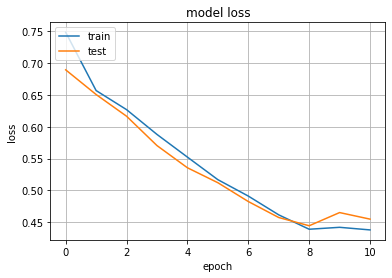

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
tf.keras.backend.clear_session()


#input 1
input1 = Input(shape=(300,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = Dropout(0.3)(x1)
x1 = BatchNormalization()(x1)
x1 = LSTM(128,return_sequences=True,)(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization()(x1)
# x1 = LSTM(128,return_sequences=True,recurrent_activation="sigmoid")(x1)
# x1 = Dropout(0.7)(x1)


x1 = Flatten()(x1)

#input 2
input2 = Input(shape=(max_review_length,))
x2 = Embedding(input_dim= vocab_dict['teacher_prefix']+2,output_dim= 2)(input2)
x2 = Flatten()(x2)

#input 3
input3 = Input(shape=(max_review_length,))
x3 = Embedding(input_dim= vocab_dict['school_state']+2,output_dim= 2)(input3)
x3 = Flatten()(x3)

#input 4
input4 = Input(shape=(max_review_length,))
x4 = Embedding(input_dim=vocab_dict['clean_categories']+2,output_dim= 2)(input4)
x4 = Flatten()(x4)

#input 5
input5 = Input(shape=(max_review_length,))
x5 = Embedding(input_dim= vocab_dict['clean_subcategories']+2,output_dim= 10)(input5)
x5 = Flatten()(x5)

#input 6
input6 = Input(shape=(max_review_length,))
x6 = Embedding(input_dim= vocab_dict['project_grade_category']+2,output_dim= 2)(input6)
x6 = Flatten()(x6)

#input 7
input7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L1(0.01))(input7)

#merging all the inputs 
Concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(64,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(Concat)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.1)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)
model.load_weights('model2_1.hdf5')

In [ ]:
roc_auc_score(y_train,model.predict(tr))

0.7395961117115412

In [ ]:
roc_auc_score(y_test,model.predict(ts))

0.7149390188241542

### Model-3 Without CountVectorizer

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


t = Tokenizer()
t.fit_on_texts(X_train['essay'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
X_train_essay = t.texts_to_sequences(X_train['essay'])
X_test_essay = t.texts_to_sequences(X_test['essay'])

print(X_train_essay)



# pad documents to a max length of 4 words
max_length = 500
X_tr_essay = pad_sequences(X_train_essay, maxlen=max_length, padding='post')
X_ts_essay = pad_sequences(X_test_essay, maxlen=max_length, padding='post')

print(X_tr_essay)


# load the whole embedding into memory
embeddings_index = dict()
fr = open('glove_vectors','rb')
f = pickle.load(fr)


def embedding_mat(word_index,embedding_dim = 300):
	embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
	for word, i in word_index.items():
			embedding_vector =f.get(word)
			if embedding_vector is not None:
					embedding_matrix[i] = embedding_vector
	return embedding_matrix

embedding_matrix = embedding_mat(t.word_index)	

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[   4    1   22 ...    0    0    0]
 [   4    1 1071 ...    0    0    0]
 [ 169  677  852 ...    0    0    0]
 ...
 [   2  325    1 ...    0    0    0]
 [  14   64  149 ...    0    0    0]
 [  14   82    3 ...    0    0    0]]


In [ ]:
import scipy
from numpy import hstack



tr1=hstack([X_tr_teacher_prefix,X_tr_school_state])
tr1=hstack((tr1,X_tr_clean_categories,X_tr_clean_subcategories))
tr=hstack((tr1,X_tr_project_grade_category,X_train['remaining_input'].values.reshape(X_tr_school_state.shape[0],-1)))

ts1=hstack((X_ts_teacher_prefix,X_ts_school_state))
ts1=hstack((ts1,X_ts_clean_categories,X_ts_clean_subcategories))
ts=hstack((ts1,X_ts_project_grade_category,X_test['remaining_input'].values.reshape(X_ts_school_state.shape[0],-1)))






tr=[X_tr_essay,tr.reshape(76473, 16,1)]

ts=[X_ts_essay,ts.reshape(32775, 16,1)]

In [ ]:
tf.keras.backend.clear_session()

#input 1
input1 = Input(shape=(500,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = LSTM(16,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Flatten()(x1)

# input 2
input2 = Input(shape=(16,1))
x2 = Conv1D(32,3,strides=1)(input2)
x2 = Conv1D(16,1,strides=1)(x2)
x2 = Conv1D(8,3,strides=1)(x2)
x2 = Flatten()(x2)

# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(80,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(concat)
x = Dropout(0.5)(x)
x = Dense(40,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.2)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with two inputs
model = Model([input1,input2], output)
model.eager = True
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 300)     14799000    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 500, 300)     0           embedding[0][0]                  
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 500, 32)      42624       spatial_dropout1d[0][0]          
_______________________________________________________________________________________

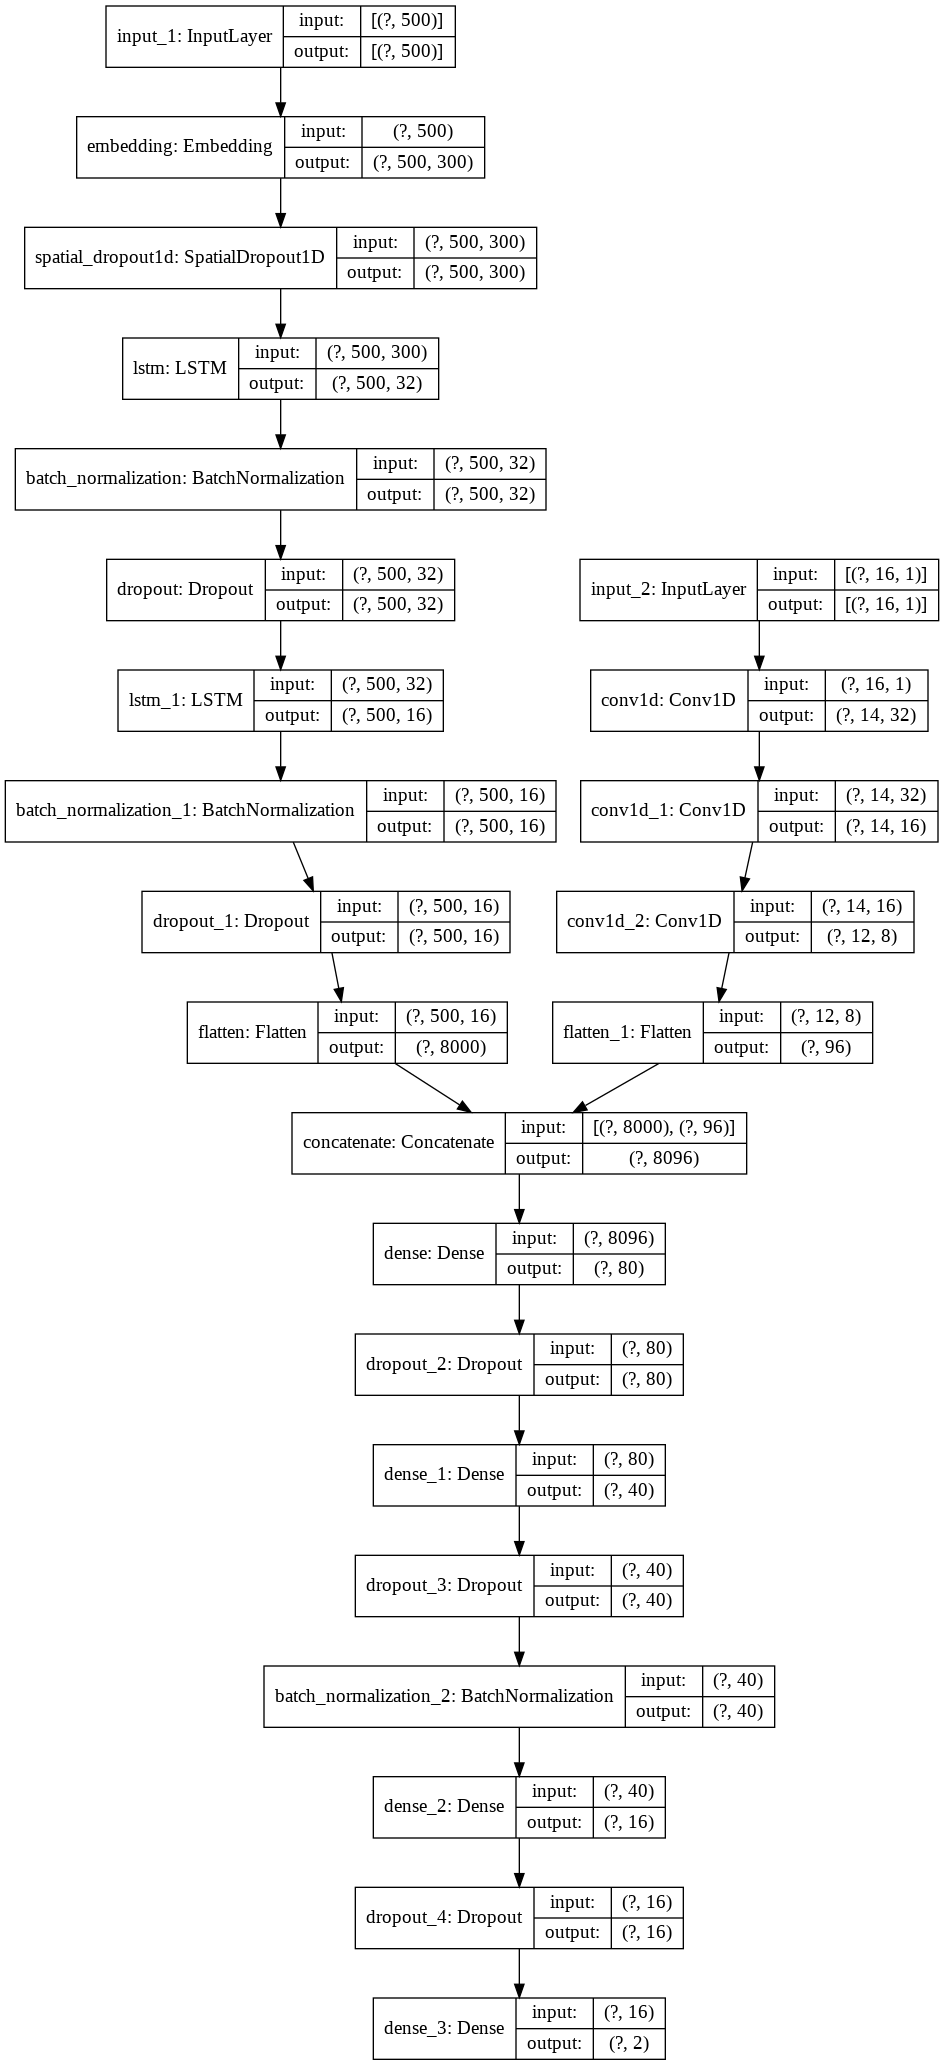

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
filepath="model3_1.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
earlystopping = EarlyStopping(monitor='val_auc',min_delta=0.00001, patience=10, verbose=1)
lr = LearningRateScheduler(step_decay)
clr_triangular = CyclicLR(mode='triangular')

callbacks_list = [checkpoint,lr,earlystopping,clr_triangular]

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay = 1e-4),metrics=[auc])


history = model.fit(tr, y_train, validation_split = 0.3, epochs=20, verbose=1, batch_size=512, callbacks = callbacks_list)

Train on 53531 samples, validate on 22942 samples
Epoch 1/20
53531/53531 [==============================] - ETA: 0s - loss: 0.8188 - auc: 0.5119
Epoch 00001: val_auc improved from -inf to 0.53347, saving model to model3_1.hdf5
53531/53531 [==============================] - 111s 2ms/sample - loss: 0.8188 - auc: 0.5119 - val_loss: 0.5202 - val_auc: 0.5335
Epoch 2/20
53531/53531 [==============================] - ETA: 0s - loss: 0.5609 - auc: 0.5149
Epoch 00002: val_auc improved from 0.53347 to 0.56900, saving model to model3_1.hdf5
53531/53531 [==============================] - 110s 2ms/sample - loss: 0.5609 - auc: 0.5149 - val_loss: 0.4644 - val_auc: 0.5690
Epoch 3/20
53531/53531 [==============================] - ETA: 0s - loss: 0.5062 - auc: 0.5218
Epoch 00003: val_auc improved from 0.56900 to 0.59858, saving model to model3_1.hdf5
53531/53531 [==============================] - 111s 2ms/sample - loss: 0.5062 - auc: 0.5218 - val_loss: 0.4533 - val_auc: 0.5986
Epoch 4/20
53531/53531 [==

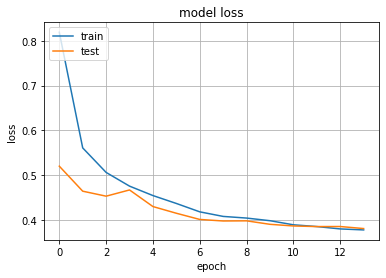

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
tf.keras.backend.clear_session()

#input 1
input1 = Input(shape=(500,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = LSTM(16,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Flatten()(x1)

# input 2
input2 = Input(shape=(16,1))
x2 = Conv1D(32,3,strides=1)(input2)
x2 = Conv1D(16,1,strides=1)(x2)
x2 = Conv1D(8,3,strides=1)(x2)
x2 = Flatten()(x2)

# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(80,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(concat)
x = Dropout(0.5)(x)
x = Dense(40,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.2)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with two inputs
model = Model([input1,input2], output)

model.load_weights('model3_1.hdf5')

In [ ]:
roc_auc_score(y_train,model.predict(tr))

0.7783138552416022

In [ ]:
roc_auc_score(y_test,model.predict(ts))

0.764596551805379

###Model 3 with countvectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer()

In [ ]:
from sklearn.model_selection import train_test_split


data = pd.read_csv('preprocessed_data.csv')

data['remaining_input'] = data['teacher_number_of_previously_posted_projects'] + data['price']

data.replace(to_replace=np.NaN, value= str('nan'),inplace=True)
y = data['project_is_approved'].values

col = ['teacher_prefix', 'school_state', 'project_grade_category',
       'clean_categories', 'clean_subcategories','essay',
       'remaining_input']

data = data[col]


X_train, X_test, y_train, y_test = train_test_split(data, y ,test_size=0.3,random_state=0, stratify = y)

In [ ]:
x_tr_project_grade_category = vect.fit_transform(X_train['project_grade_category'].values)
x_ts_project_grade_category = vect.fit(X_train['project_grade_category'].values)

print(x_tr_project_grade_category.shape)

(76473, 4)


In [ ]:
x_tr_clean_subcategories = vect.fit_transform(X_train['clean_subcategories'].values)
x_ts_clean_subcategories = vect.fit(X_train['clean_subcategories'].values)

print(x_tr_clean_subcategories.shape)

(76473, 30)


In [ ]:
x_tr_clean_categories = vect.fit_transform(X_train['clean_categories'].values)
x_ts_clean_categories = vect.fit(X_train['clean_categories'].values)

print(x_tr_clean_categories.shape)

(76473, 9)


In [ ]:
x_tr_teacher_prefix = vect.fit_transform(X_train['teacher_prefix'].values)
x_ts_teacher_prefix = vect.fit(X_train['teacher_prefix'].values)

print(x_tr_teacher_prefix.shape)

(76473, 5)


In [ ]:
x_tr_school_state = vect.fit_transform(X_train['school_state'].values)
x_ts_school_state = vect.fit(X_train['school_state'].values)

print(x_tr_school_state.shape)

(76473, 51)


In [ ]:
cols= x_tr_school_state.shape[1]+x_tr_teacher_prefix.shape[1]+x_tr_clean_categories.shape[1]+x_tr_clean_subcategories.shape[1]+x_tr_project_grade_category.shape[1]
print(cols)

99


In [ ]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


t = Tokenizer()
t.fit_on_texts(X_train['essay'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
X_train_essay = t.texts_to_sequences(X_train['essay'])
X_test_essay = t.texts_to_sequences(X_test['essay'])

print(X_train_essay)



# pad documents to a max length of 4 words
max_length = 500
X_tr_essay = pad_sequences(X_train_essay, maxlen=max_length, padding='post')
X_ts_essay = pad_sequences(X_test_essay, maxlen=max_length, padding='post')

print(X_tr_essay)


# load the whole embedding into memory
embeddings_index = dict()
fr = open('glove_vectors','rb')
f = pickle.load(fr)


def embedding_mat(word_index,embedding_dim = 300):
	embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
	for word, i in word_index.items():
			embedding_vector =f.get(word)
			if embedding_vector is not None:
					embedding_matrix[i] = embedding_vector
	return embedding_matrix

embedding_matrix = embedding_mat(t.word_index)	

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[   4    1   22 ...    0    0    0]
 [   4    1 1071 ...    0    0    0]
 [ 169  677  852 ...    0    0    0]
 ...
 [   2  325    1 ...    0    0    0]
 [  14   64  149 ...    0    0    0]
 [  14   82    3 ...    0    0    0]]


In [ ]:
import scipy
from numpy import hstack

tr=hstack((X_tr_teacher_prefix, X_tr_school_state, X_tr_clean_categories, 
           X_tr_clean_subcategories, X_tr_project_grade_category, X_train['remaining_input'].values.reshape(X_tr_school_state.shape[0],-1)))

tr=hstack((X_ts_teacher_prefix, X_ts_school_state, X_ts_clean_categories,
           X_ts_clean_subcategories, X_ts_project_grade_category, X_test['remaining_input'].values.reshape(X_ts_school_state.shape[0],-1)))






tr=[X_tr_essay,tr]

ts=[X_ts_essay,ts]

In [ ]:
tf.keras.backend.clear_session()

#input 1
input1 = Input(shape=(500,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = LSTM(16,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Flatten()(x1)

# input 2
input2 = Input(shape=(13,1))
x2 = Conv1D(32,3,strides=1)(input2)
x2 = Conv1D(16,1,strides=1)(x2)
x2 = Conv1D(8,3,strides=1)(x2)
x2 = Flatten()(x2)

# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(80,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(concat)
x = Dropout(0.5)(x)
x = Dense(40,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.2)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with two inputs
model = Model([input1,input2], output)

print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 300)     14799000    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 500, 300)     0           embedding[0][0]                  
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 500, 32)      42624       spatial_dropout1d[0][0]          
_______________________________________________________________________________________

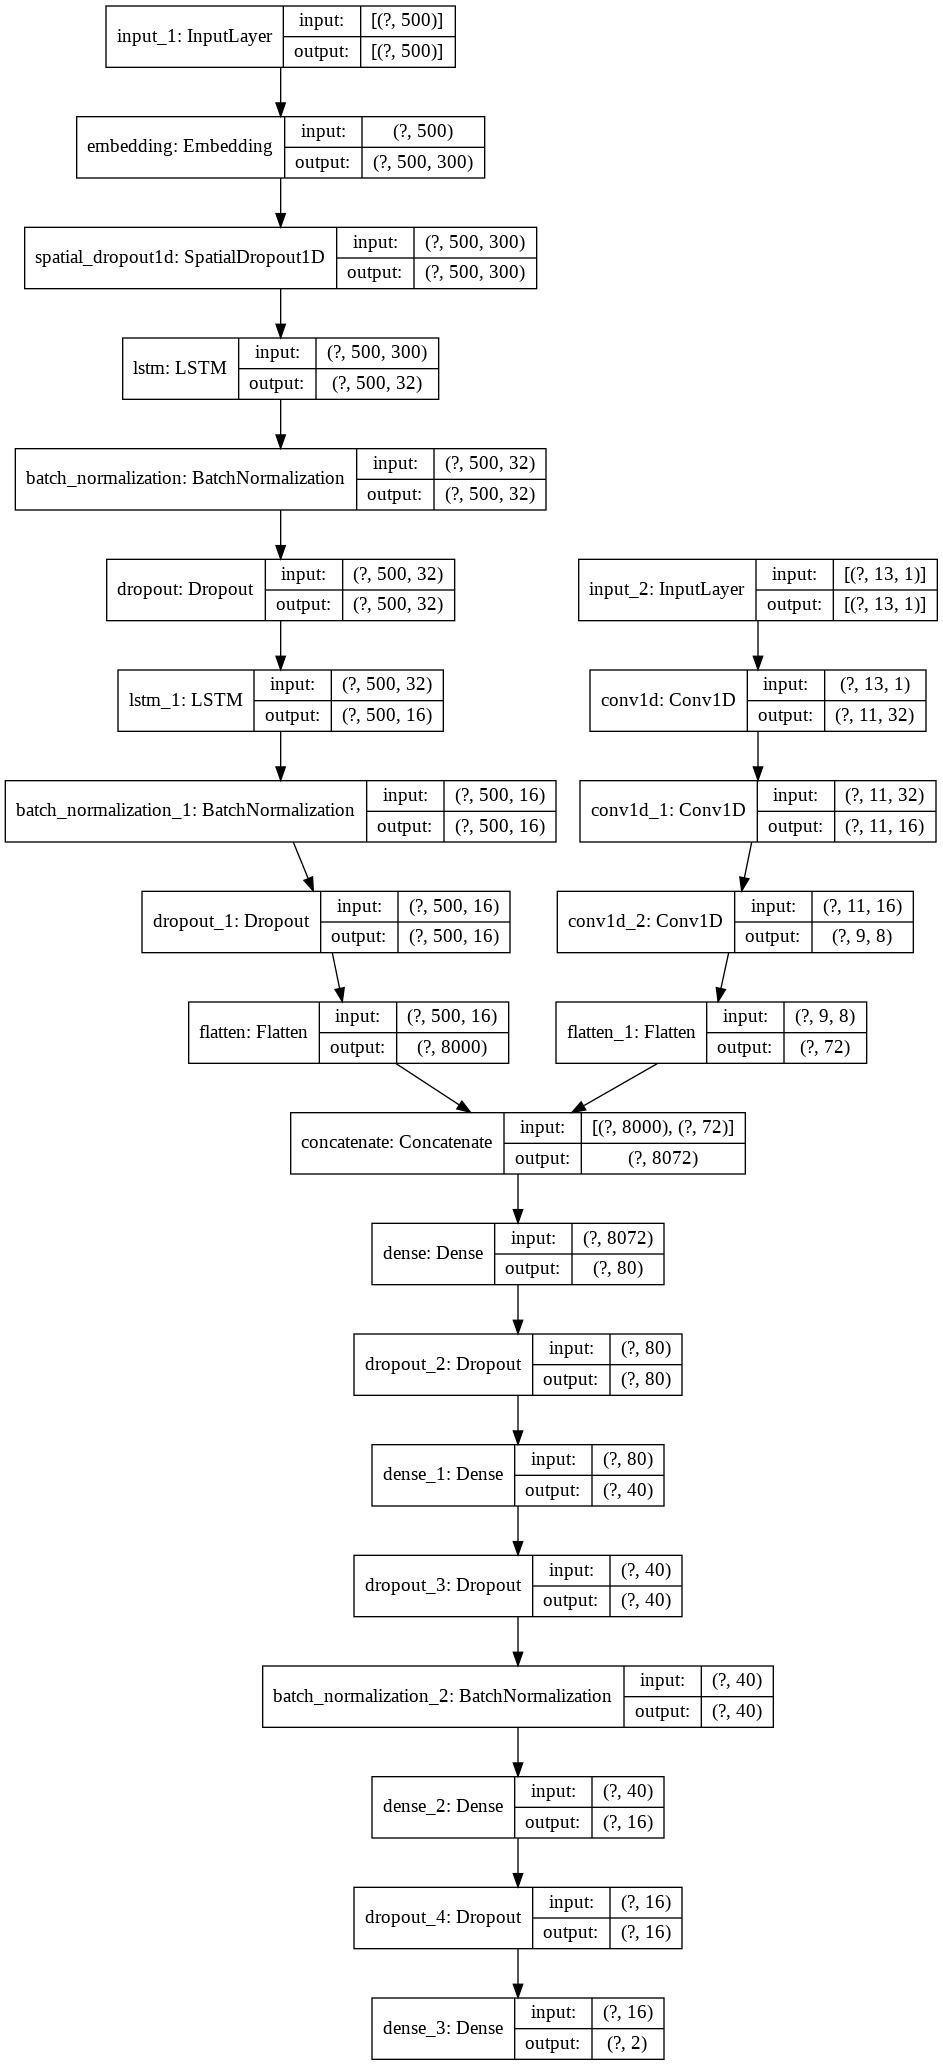

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
filepath="model3_2.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
earlystopping = EarlyStopping(monitor='val_auc',min_delta=0.00001, patience=10, verbose=1,mode = 'max')
lr = LearningRateScheduler(step_decay)
clr_triangular = CyclicLR(mode='triangular')

callbacks_list = [checkpoint,lr,earlystopping,clr_triangular]

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay = 1e-4),metrics=[auc])


history = model.fit(tr, y_train, validation_split = 0.3, epochs=30, verbose=1, batch_size=512, callbacks = callbacks_list)

Train on 53531 samples, validate on 22942 samples
Epoch 1/30
53531/53531 [==============================] - ETA: 0s - loss: 0.5080 - auc: 0.5221
Epoch 00001: val_auc improved from -inf to 0.55309, saving model to model3_2.hdf5
53531/53531 [==============================] - 114s 2ms/sample - loss: 0.5080 - auc: 0.5221 - val_loss: 0.5162 - val_auc: 0.5531
Epoch 2/30
53531/53531 [==============================] - ETA: 0s - loss: 0.4599 - auc: 0.5757
Epoch 00002: val_auc improved from 0.55309 to 0.63388, saving model to model3_2.hdf5
53531/53531 [==============================] - 108s 2ms/sample - loss: 0.4599 - auc: 0.5757 - val_loss: 0.4696 - val_auc: 0.6339
Epoch 3/30
53531/53531 [==============================] - ETA: 0s - loss: 0.4290 - auc: 0.6647
Epoch 00003: val_auc improved from 0.63388 to 0.71986, saving model to model3_2.hdf5
53531/53531 [==============================] - 108s 2ms/sample - loss: 0.4290 - auc: 0.6647 - val_loss: 0.4118 - val_auc: 0.7199
Epoch 4/30
53531/53531 [==

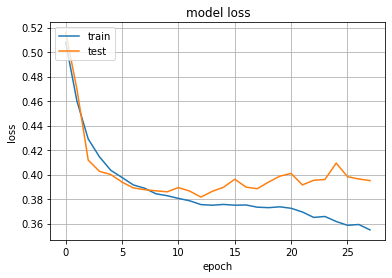

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
tf.keras.backend.clear_session()

#input 1
input1 = Input(shape=(500,))
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[embedding_matrix],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = LSTM(32,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = LSTM(16,return_sequences=True)(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)
x1 = Flatten()(x1)

# input 2
input2 = Input(shape=(16,1))
x2 = Conv1D(32,3,strides=1)(input2)
x2 = Conv1D(16,1,strides=1)(x2)
x2 = Conv1D(8,3,strides=1)(x2)
x2 = Flatten()(x2)

# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(80,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(concat)
x = Dropout(0.5)(x)
x = Dense(40,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=L2(0.0001))(x)
x = Dropout(0.2)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with two inputs
model = Model([input1,input2], output)

model.load_weights('model3_2.hdf5')

In [ ]:
roc_auc_score(y_train,model.predict(tr))

0.7960845575714186

In [ ]:
roc_auc_score(y_test,model.predict(ts))

0.7663776884947461

###Conclusion

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["S.NO.", "architecture", "Test AUC"]
x.add_row(["1", "model1", "0.7607"])
x.add_row(["2", "model2","0.7149"])
x.add_row(["3", "model3 without countvectorizer","0.7634"])
x.add_row(["4", "model3 with countvectorizer","0.7663"])


print(x)

+-------+--------------------------------+----------+
| S.NO. |          architecture          | Test AUC |
+-------+--------------------------------+----------+
|   1   |             model1             |  0.7607  |
|   2   |             model2             |  0.7149  |
|   3   | model3 without countvectorizer |  0.7634  |
|   4   |  model3 with countvectorizer   |  0.7663  |
+-------+--------------------------------+----------+
